In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('indian_liver_patient.csv')
df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

In [3]:
df.tail()

Age Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
578   60   Male              0.5               0.1                   500   
579   40   Male              0.6               0.1                    98   
580   52   Male              0.8               0.2                   245   
581   31   Male              1.3               0.5                   184   
582   38   Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
578      1.6                        0.37        2  
579      3.2                        1.10        1  
580      3.2                        1.00        1  
581      3.4                        1.00        1  
582      4.4                        1.50        2

In [4]:
df.shape

(583, 11)

**Healthy Ranges for the 10 feature columns**

- Total_Bilirubin = 0.1 to 1.2 mg/dL = 1.71 to 20.5 umol/L

- Direct_Bilirubin = < 0.3 mg/dL = < 5.1 umol/L

- Alkaline_Phosphatase = 44 to 147 IU/L (High levels of ALP are seen in children undergoing growth and pregnant women)

- Alamine_Aminotransferase = 29 to 33 IU/L (Age and gender can affect the value)

- Aspartate_Aminotransferase = 1 to 45 U/L (Values are slightly lower in females) Total_Proteins = 6.0 to 8.3 g/dL

- Albumin = 3.4 to 5.4 g/dL

- Albumin_and_Globulin_Ratio = Adult: 3.7 to 5.2 g/dL; Older Adult: 3.2 to 4.6 g/dL; >90 yr: 2.9 to 4.5 g/dL

**Note: These values may differ based on the different guidelines or hospitals. The values above were obtained from google**

In [5]:
df=df.rename(columns={'Dataset':'IsDisease'})

In [6]:
df['IsDisease'].value_counts()

1    416
2    167
Name: IsDisease, dtype: int64

In [7]:
#df['IsDisease']=df['IsDisease'].replace({1:0,2:1})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  IsDisease                   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [9]:
df.describe().T

count        mean         std   min    25%  \
Age                         583.0   44.746141   16.189833   4.0   33.0   
Total_Bilirubin             583.0    3.298799    6.209522   0.4    0.8   
Direct_Bilirubin            583.0    1.486106    2.808498   0.1    0.2   
Alkaline_Phosphotase        583.0  290.576329  242.937989  63.0  175.5   
Alamine_Aminotransferase    583.0   80.713551  182.620356  10.0   23.0   
Aspartate_Aminotransferase  583.0  109.910806  288.918529  10.0   25.0   
Total_Protiens              583.0    6.483190    1.085451   2.7    5.8   
Albumin                     583.0    3.141852    0.795519   0.9    2.6   
Albumin_and_Globulin_Ratio  579.0    0.947064    0.319592   0.3    0.7   
IsDisease                   583.0    1.286449    0.452490   1.0    1.0   

                               50%    75%     max  
Age                          45.00   58.0    90.0  
Total_Bilirubin               1.00    2.6    75.0  
Direct_Bilirubin              0.30    1.3    19.7  
Alkaline_Phosphotase        208.00  298.0  2110.0  
Alamine_Aminotransferase     35.00   60.5  2000.0  
Aspartate_Aminotransferase   42.00   87.0  4929.0  
Total_Protiens                6.60    7.2     9.6  
Albumin                       3.10    3.8     5.5  
Albumin_and_Globulin_Ratio    0.93    1.1     2.8  
IsDisease                     1.00    2.0     2.0

In [10]:
df.describe(include='all').T

count unique   top freq        mean         std  \
Age                         583.0    NaN   NaN  NaN   44.746141   16.189833   
Gender                        583      2  Male  441         NaN         NaN   
Total_Bilirubin             583.0    NaN   NaN  NaN    3.298799    6.209522   
Direct_Bilirubin            583.0    NaN   NaN  NaN    1.486106    2.808498   
Alkaline_Phosphotase        583.0    NaN   NaN  NaN  290.576329  242.937989   
Alamine_Aminotransferase    583.0    NaN   NaN  NaN   80.713551  182.620356   
Aspartate_Aminotransferase  583.0    NaN   NaN  NaN  109.910806  288.918529   
Total_Protiens              583.0    NaN   NaN  NaN     6.48319    1.085451   
Albumin                     583.0    NaN   NaN  NaN    3.141852    0.795519   
Albumin_and_Globulin_Ratio  579.0    NaN   NaN  NaN    0.947064    0.319592   
IsDisease                   583.0    NaN   NaN  NaN    1.286449     0.45249   

                             min    25%    50%    75%     max  
Age                          4.0   33.0   45.0   58.0    90.0  
Gender                       NaN    NaN    NaN    NaN     NaN  
Total_Bilirubin              0.4    0.8    1.0    2.6    75.0  
Direct_Bilirubin             0.1    0.2    0.3    1.3    19.7  
Alkaline_Phosphotase        63.0  175.5  208.0  298.0  2110.0  
Alamine_Aminotransferase    10.0   23.0   35.0   60.5  2000.0  
Aspartate_Aminotransferase  10.0   25.0   42.0   87.0  4929.0  
Total_Protiens               2.7    5.8    6.6    7.2     9.6  
Albumin                      0.9    2.6    3.1    3.8     5.5  
Albumin_and_Globulin_Ratio   0.3    0.7   0.93    1.1     2.8  
IsDisease                    1.0    1.0    1.0    2.0     2.0

In [11]:
# Define a function that allows us to create a table of missing values in df_liver and their percentages in 
# descending order
def missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    percentage_final = (round(percentage, 2) * 100)
    total_percent = pd.concat(objs=[total, percentage_final], axis = 1, keys=['Total', '%'])
    return total_percent

In [12]:
missing_values(df)

Total    %
Albumin_and_Globulin_Ratio      4  1.0
Age                             0  0.0
Gender                          0  0.0
Total_Bilirubin                 0  0.0
Direct_Bilirubin                0  0.0
Alkaline_Phosphotase            0  0.0
Alamine_Aminotransferase        0  0.0
Aspartate_Aminotransferase      0  0.0
Total_Protiens                  0  0.0
Albumin                         0  0.0
IsDisease                       0  0.0

In [13]:
df['Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean())
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
IsDisease                     0
dtype: int64

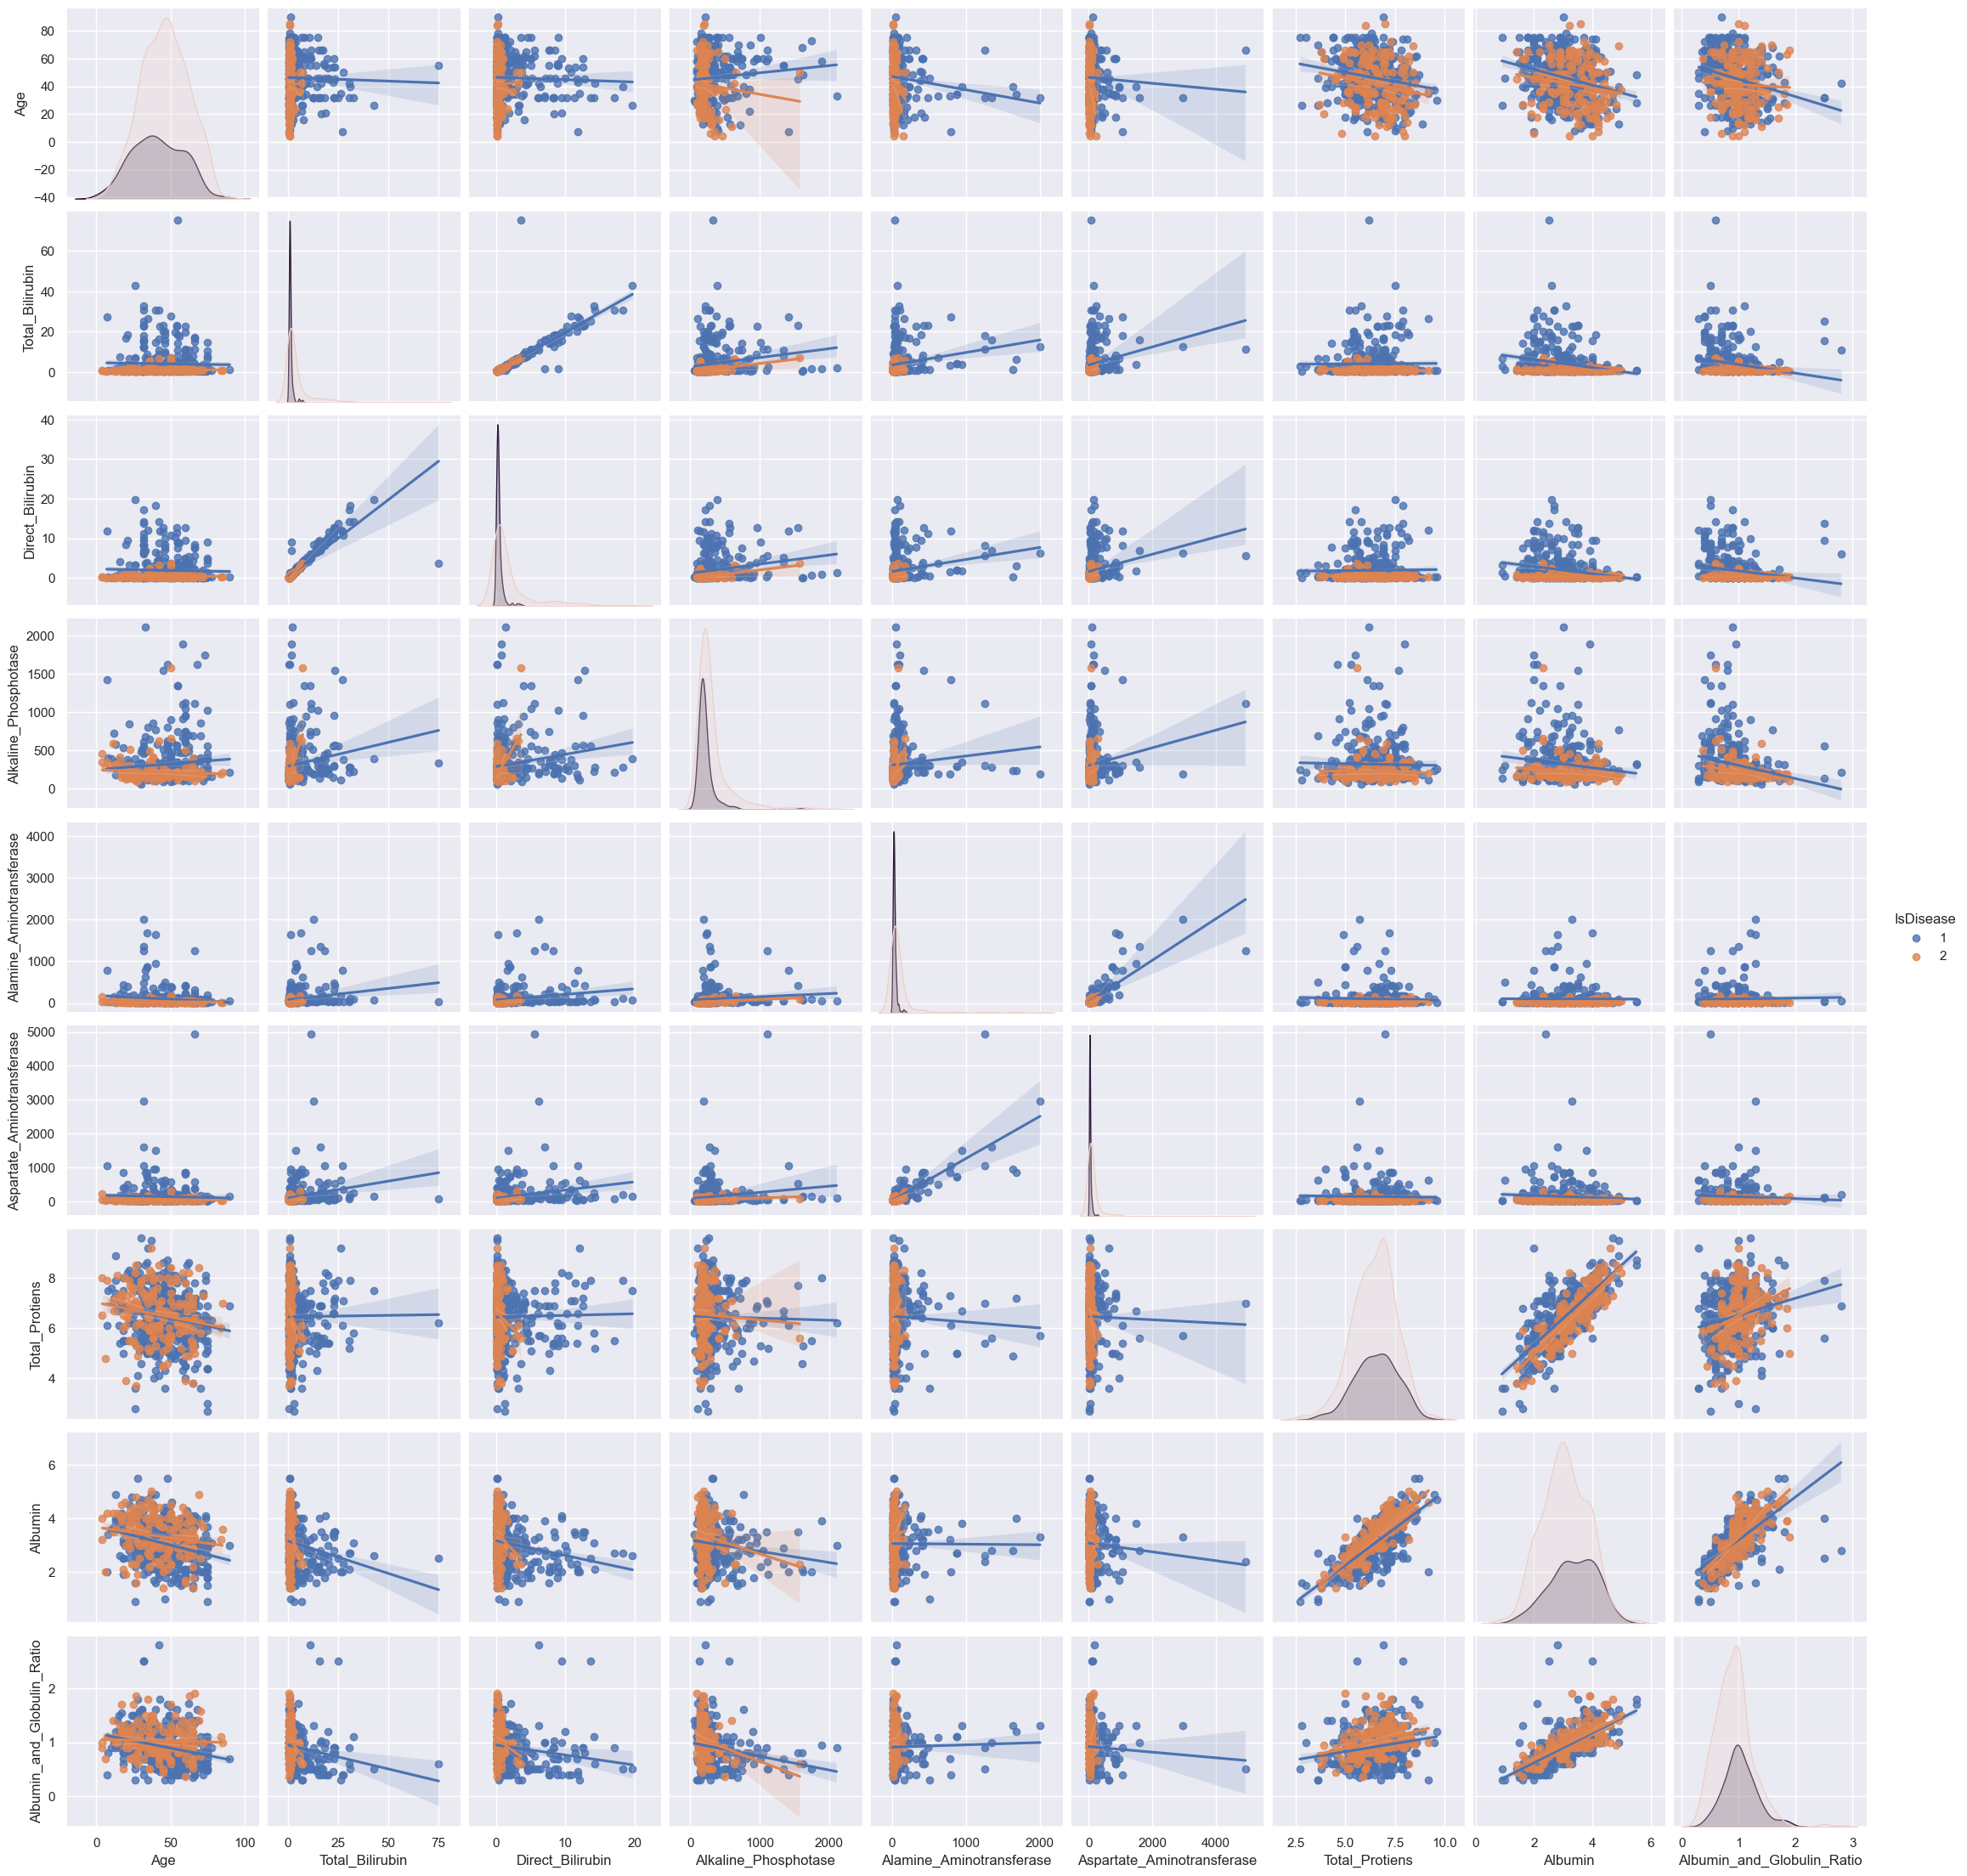

In [20]:
# Correlation pairplot
sns.set()
sns.pairplot(df, hue='IsDisease', kind='reg')

Based on the correlative pair plots, we find some interesting results directly.

-Positive correlations:

Total Bilirubin and Direct Bilirubin (vice-versa)

Alamine Aminotransferase and Aspartate Aminotransferase (vice-versa)

Total Protein and Albumin (vice-versa)

Albumin and Globulin Ratio and Albumin (vice-versa)

Total Protein and Albumin and Globulin Ration (vice-versa)

-Negative correlations:

Total Protein and age (vice-versa)

Albumin and age (vice-versa)

Albumin and Globulin Ration and age (vice-versa)

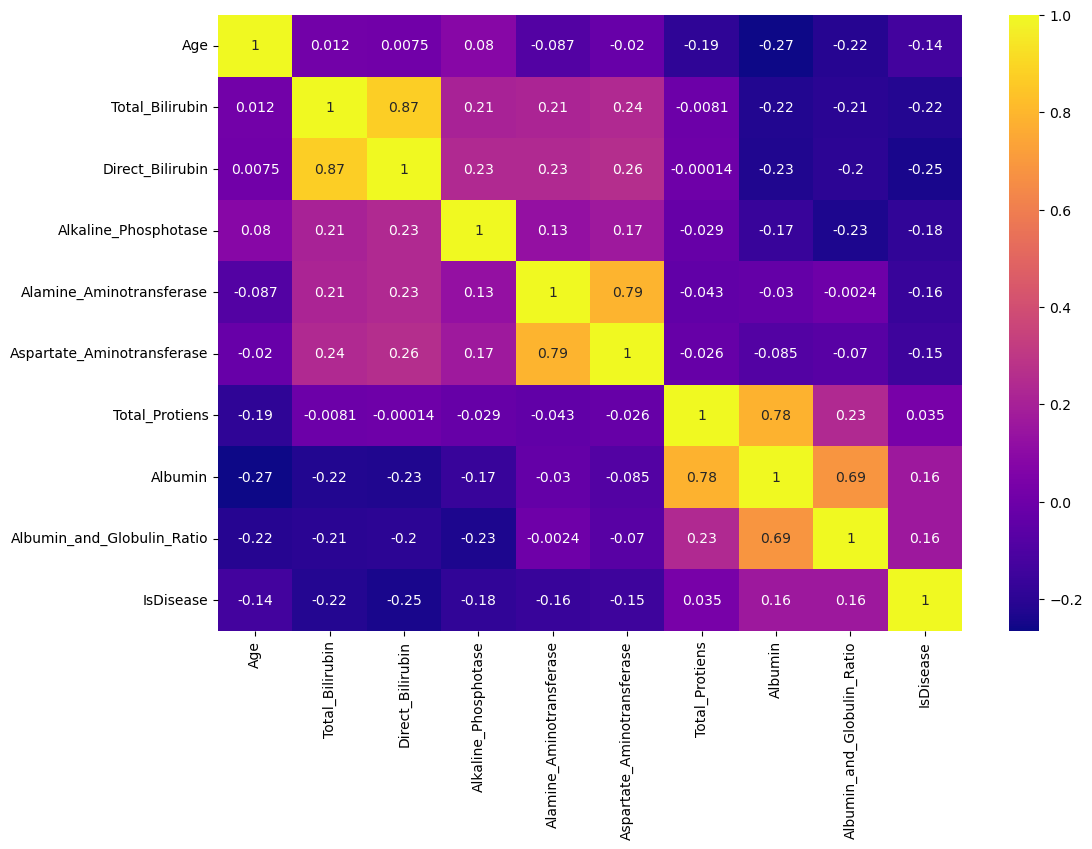

In [14]:
c=df.corr()
plt.figure(figsize=(12,8)) 
sns.heatmap(c,cmap="plasma",annot=True)
plt.show()

In [15]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

(0.0, 700.0)

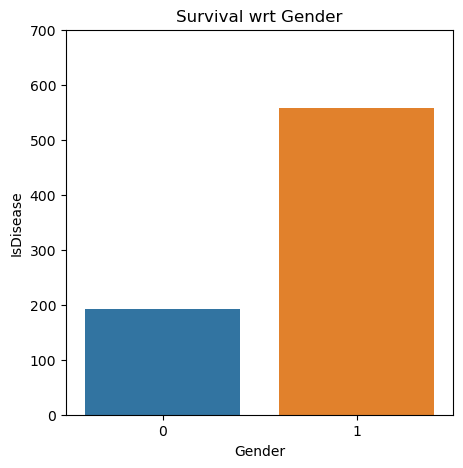

In [16]:
# Create a table for Dataset (with and without liver disease) and gender
df_liver_Gender = round(df[['Gender', 'IsDisease']].groupby(['Gender'], as_index=False).agg(np.sum), 3)

# Generate plot to determine the effect of gender on the dataset (target feature)
# Figure configuration
plt.figure(figsize=(5,5))

sns.barplot(x="Gender", y="IsDisease", data=df_liver_Gender, errorbar=None)
plt.title("Survival wrt Gender")
plt.ylim(0, 700)

Text(0.5, 1.0, 'Survival wrt Albumin conc.')

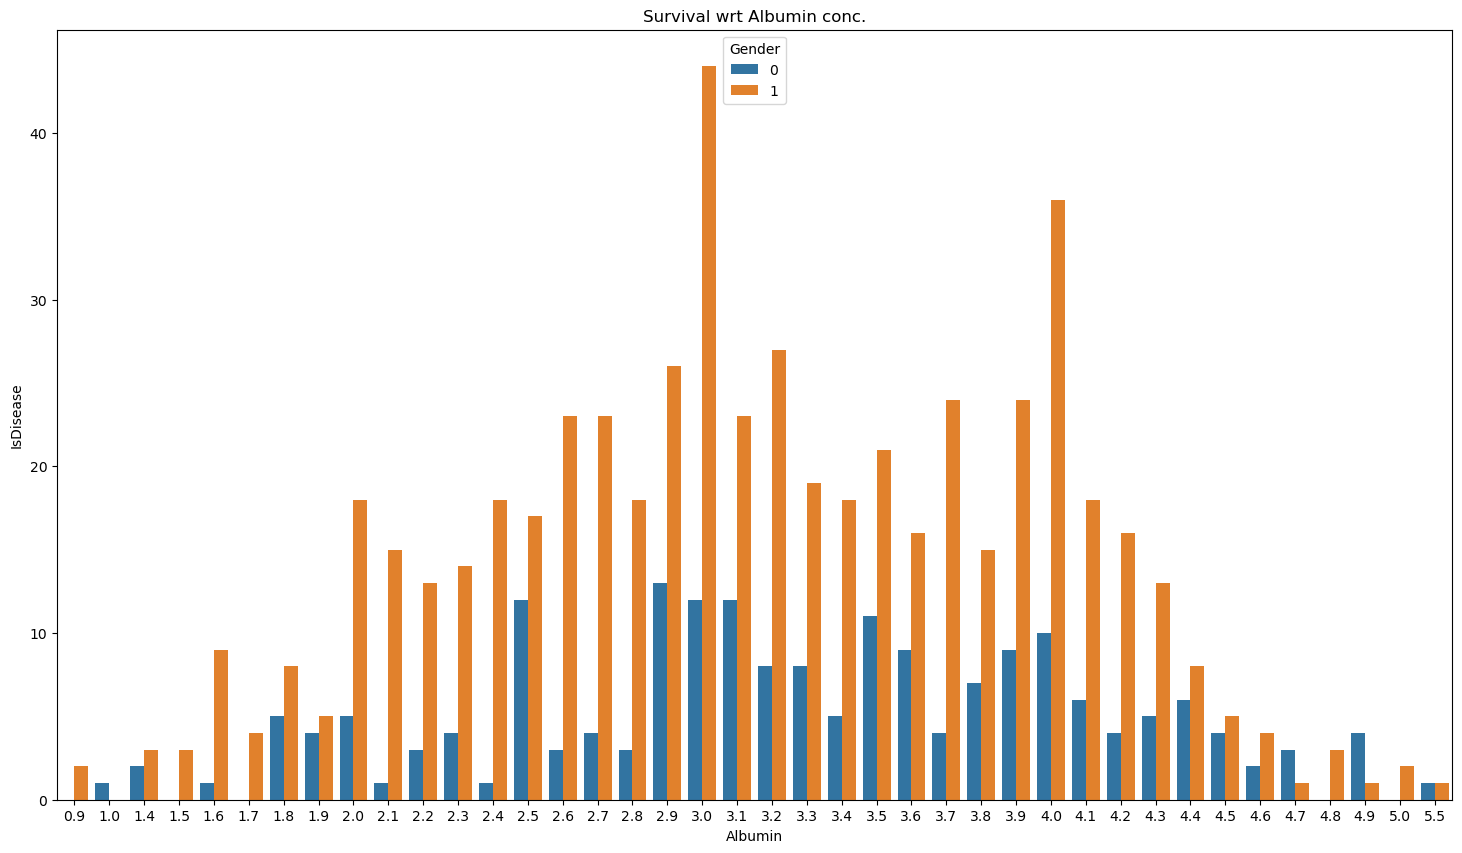

In [17]:
# Create a table for Dataset (with and without liver disease) and Albumin
df_liver_Albumin = round(df[['Gender', 'Albumin', 'IsDisease']]
                         .groupby(['Albumin', 'Gender'], as_index=False).agg(np.sum), 1)

# Generate plot to determine the effect of gender on the dataset (target feature) and Albumin
# Figure configuration
plt.figure(figsize=(18,10))

sns.barplot(x="Albumin", y='IsDisease', hue='Gender', data=df_liver_Albumin, errorbar=None)
plt.title("Survival wrt Albumin conc.")

Text(0.5, 1.0, 'Survival wrt Total Proteins conc.')

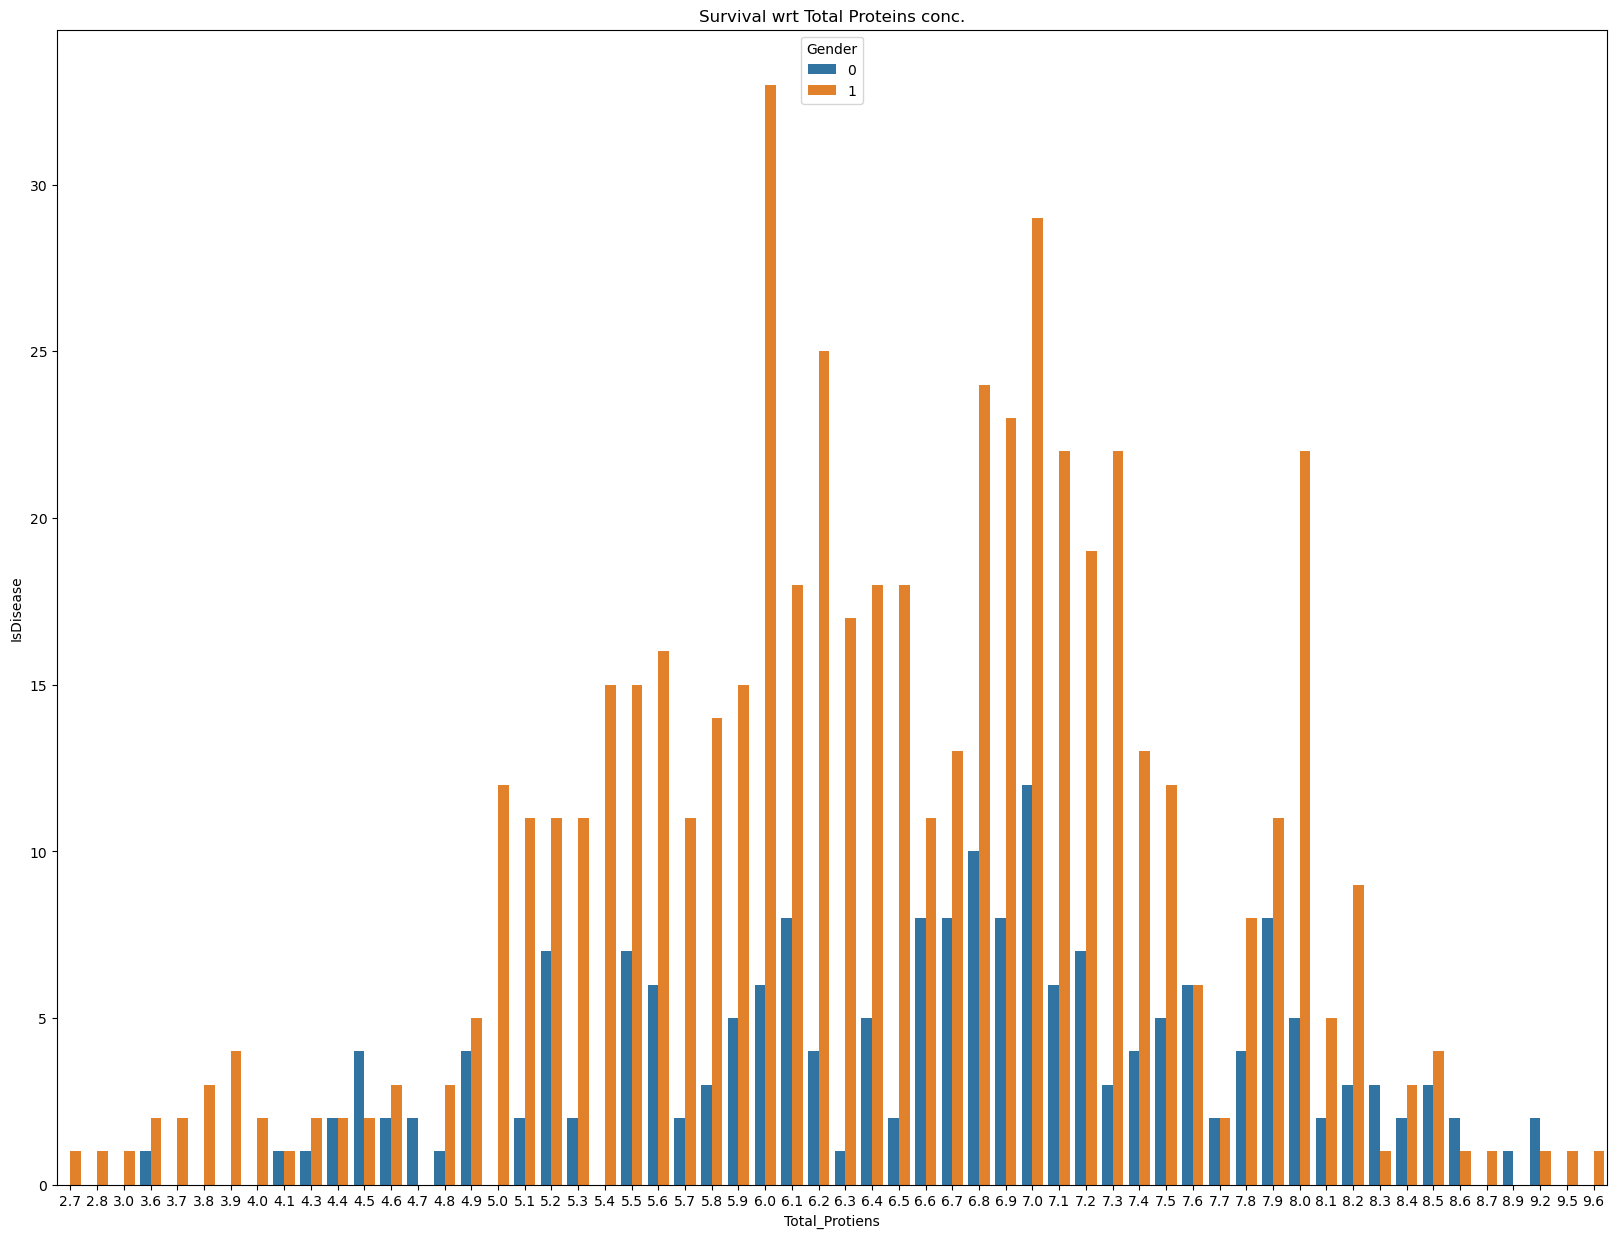

In [18]:
# Create a table for Dataset (with and without liver disease) and Total Proteins
df_liver_TP = round(df[['Gender', 'Total_Protiens', 'IsDisease']]
                    .groupby(['Total_Protiens', 'Gender'], as_index=False).agg(np.sum), 2)

# Generate plots to determine the effect of gender on the dataset (target feature) and total proteins
# Figure configuration
plt.figure(figsize=(20,15))

sns.barplot(x="Total_Protiens", y='IsDisease', hue='Gender', data=df_liver_TP, errorbar=None)
plt.title("Survival wrt Total Proteins conc.")

Text(0.5, 1.0, 'Survival wrt Albumin Globulin Ratio')

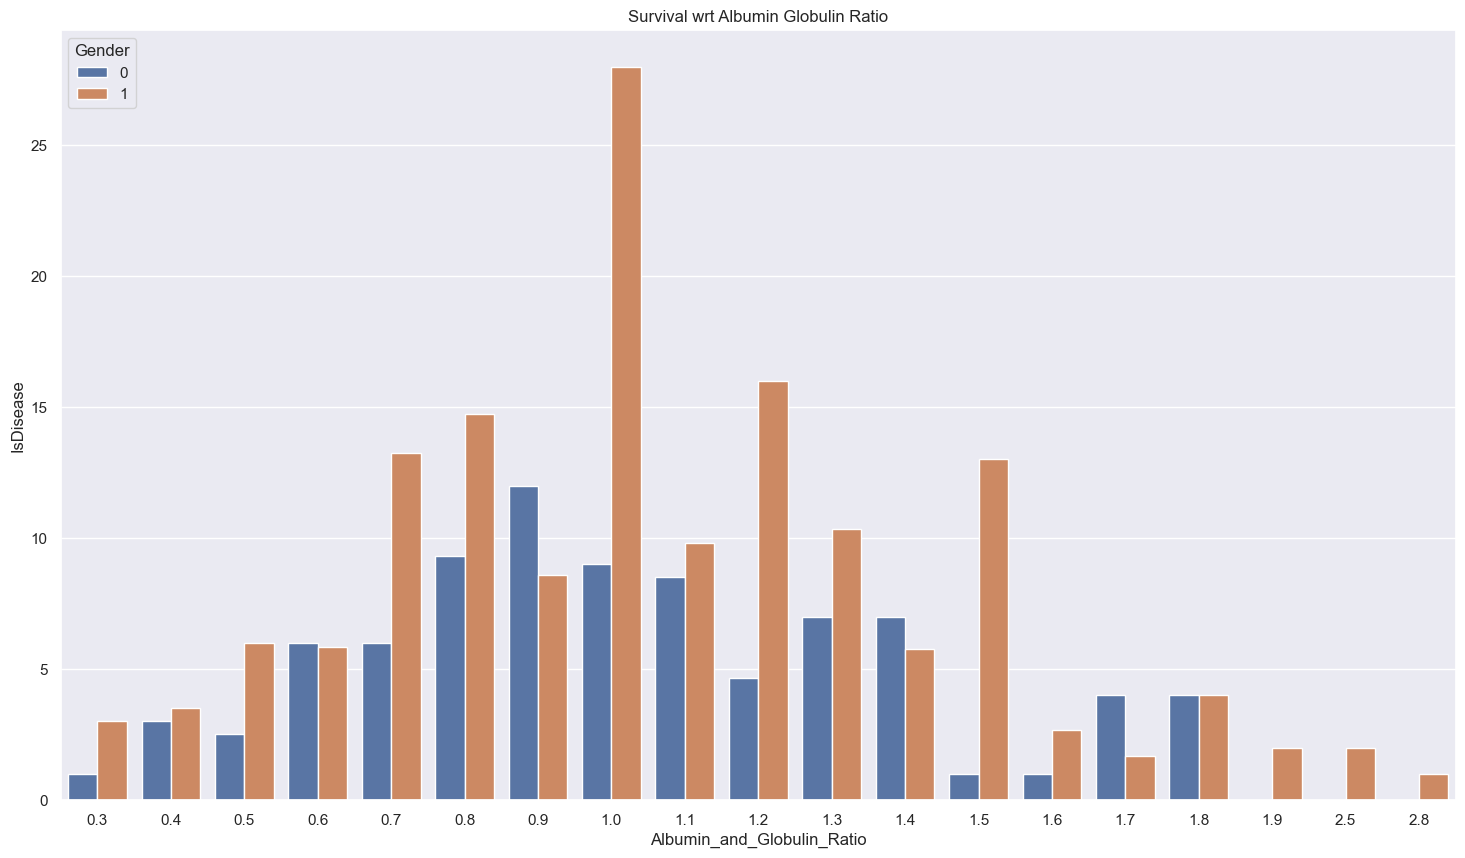

In [36]:
# Create a table for Dataset (with and without liver disease) and Alkaline Phosphatase
df_liver_ALP = round(df[['Gender', 'Albumin_and_Globulin_Ratio', 'IsDisease']]
                     .groupby(['Albumin_and_Globulin_Ratio', 'Gender'], as_index=False).agg(np.sum), 1)

# Generate plots to determine the effect of gender on the dataset (target feature) and AGR
# Figure configuration
plt.figure(figsize=(18,10))

sns.barplot(x="Albumin_and_Globulin_Ratio", y='IsDisease', hue='Gender', data=df_liver_ALP, errorbar=None)
plt.title("Survival wrt Albumin Globulin Ratio")

It appears from these plots that men normally have high liver function test results and hence are likely to have liver disease. This is likely because culturally men in NE of Andhra Pradesh in India consume alchohol more than women. Let us now look a dsitribution plot for all the liver function tests in relation to the target feature and gender.

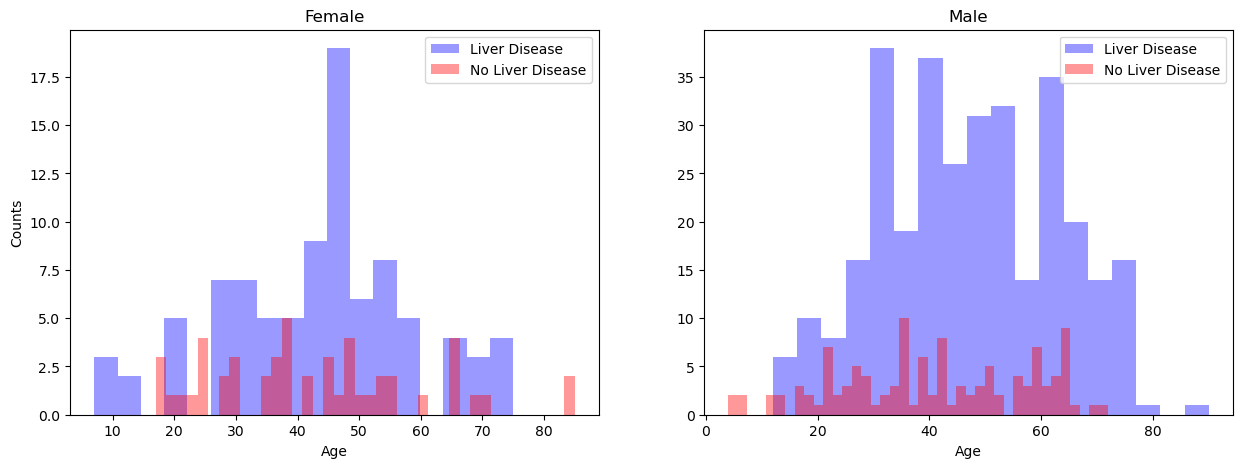

In [19]:
# Figure configuration
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualize the effect of the dataset(with or without disease) based on both Age and Gender.
ld = 'Liver Disease'
no_ld = 'No Liver Disease'
ax = sns.distplot(df[df['Gender'] == 0][df[df['Gender'] == 0]['IsDisease'] == 1]['Age'], 
                  bins=18, label=ld, ax=axes[0], kde=False, color='blue')
ax = sns.distplot(df[df['Gender'] == 0][df[df['Gender'] == 0]['IsDisease'] == 2]['Age'], 
                  bins=40, label=no_ld, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Counts')
ax = sns.distplot(df[df['Gender'] == 1][df[df['Gender'] == 1]['IsDisease'] == 1]['Age'], 
                  bins=18, label=ld, ax=axes[1], kde=False, color='blue')
ax = sns.distplot(df[df['Gender'] == 1][df[df['Gender'] == 1]['IsDisease'] == 2]['Age'], 
                  bins=40, label=no_ld, ax=axes[1], kde=False, color='red')
ax.legend()
ax.set_title('Male')

plt.show()

**This distribution plot shows some interesting things**

- 1)On average, women tend not to have liver disease than men.

- 2)The greatest number of women without liver disease were about 38 yrs old.

- 3)Girls around the age of 10 had liver disease, this may be a genetic link.

- 4)Men are more prone to liver disease (may be due to alcoholism).

- 5)The greatest number of men without liver diseae were about 38 yrs old.

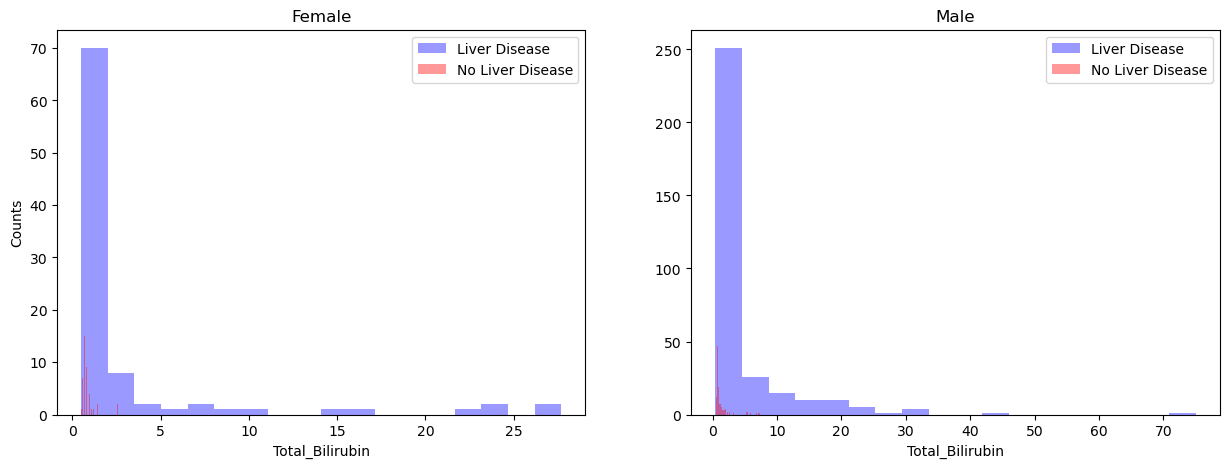

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualize the effect of the dataset(with or without disease) based on Total Bilirubin and Gender.
ld = 'Liver Disease'
no_ld = 'No Liver Disease'
ax = sns.distplot(df[df['Gender'] == 0][df[df['Gender'] == 0]['IsDisease'] == 1]['Total_Bilirubin'], 
                  bins=18, label=ld, ax=axes[0], kde=False, color='blue')
ax = sns.distplot(df[df['Gender'] == 0][df[df['Gender'] == 0]['IsDisease'] == 2]['Total_Bilirubin'], 
                  bins=40, label=no_ld, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Counts')
ax = sns.distplot(df[df['Gender'] == 1][df[df['Gender'] == 1]['IsDisease'] == 1]['Total_Bilirubin'], 
                  bins=18, label=ld, ax=axes[1], kde=False, color='blue')
ax = sns.distplot(df[df['Gender'] == 1][df[df['Gender'] == 1]['IsDisease'] == 2]['Total_Bilirubin'], 
                  bins=40, label=no_ld, ax=axes[1], kde=False, color='red')
ax.legend()
ax.set_title('Male')

plt.show()

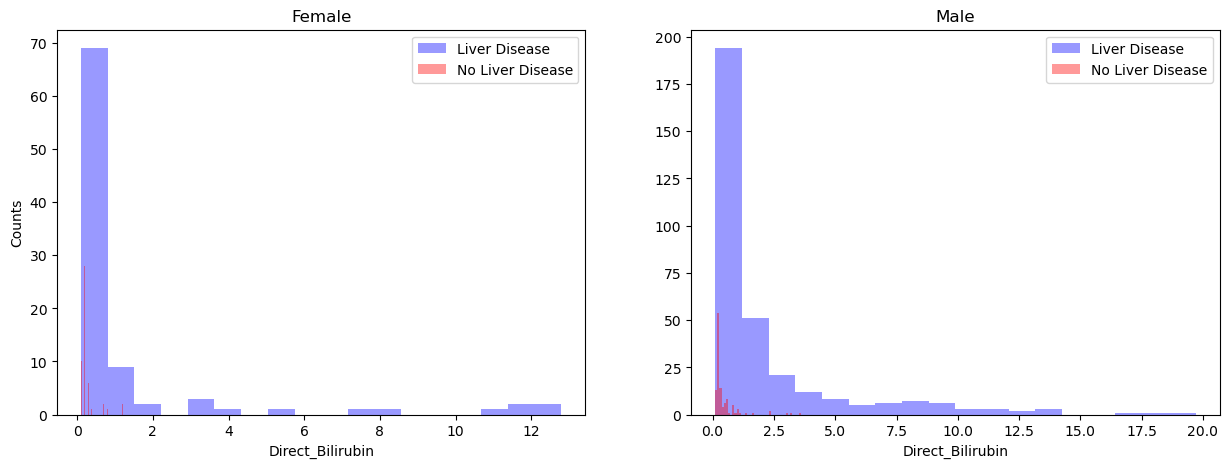

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualize the effect of the dataset(with or without disease) based on 'Direct_Bilirubin' and Gender.
ld = 'Liver Disease'
no_ld = 'No Liver Disease'
ax = sns.distplot(df[df['Gender'] == 0][df[df['Gender'] == 0]['IsDisease'] == 1]['Direct_Bilirubin'], 
                  bins=18, label=ld, ax=axes[0], kde=False, color='blue')
ax = sns.distplot(df[df['Gender'] == 0][df[df['Gender'] == 0]['IsDisease'] == 2]['Direct_Bilirubin'], 
                  bins=40, label=no_ld, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Counts')
ax = sns.distplot(df[df['Gender'] == 1][df[df['Gender'] == 1]['IsDisease'] == 1]['Direct_Bilirubin'], 
                  bins=18, label=ld, ax=axes[1], kde=False, color='blue')
ax = sns.distplot(df[df['Gender'] == 1][df[df['Gender'] == 1]['IsDisease'] == 2]['Direct_Bilirubin'], 
                  bins=40, label=no_ld, ax=axes[1], kde=False, color='red')
ax.legend()
ax.set_title('Male')

plt.show()

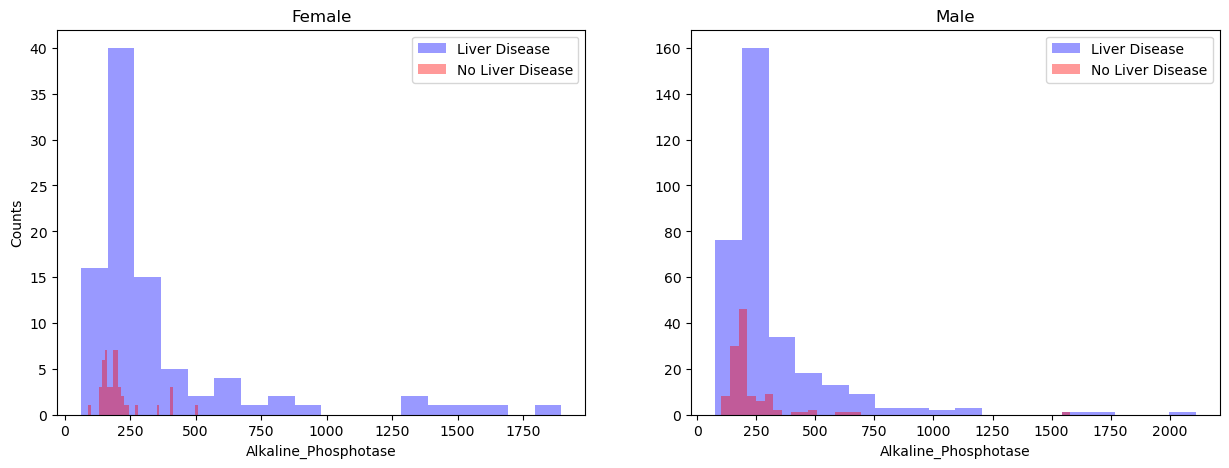

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualize the effect of the dataset(with or without disease) based on 'Alkaline_Phosphotase' and Gender.
ld = 'Liver Disease'
no_ld = 'No Liver Disease'
ax = sns.distplot(df[df['Gender'] == 0][df[df['Gender'] == 0]['IsDisease'] == 1]['Alkaline_Phosphotase'], 
                  bins=18, label=ld, ax=axes[0], kde=False, color='blue')
ax = sns.distplot(df[df['Gender'] == 0][df[df['Gender'] == 0]['IsDisease'] == 2]['Alkaline_Phosphotase'], 
                  bins=40, label=no_ld, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Counts')
ax = sns.distplot(df[df['Gender'] == 1][df[df['Gender'] == 1]['IsDisease'] == 1]['Alkaline_Phosphotase'], 
                  bins=18, label=ld, ax=axes[1], kde=False, color='blue')
ax = sns.distplot(df[df['Gender'] == 1][df[df['Gender'] == 1]['IsDisease'] == 2]['Alkaline_Phosphotase'], 
                  bins=40, label=no_ld, ax=axes[1], kde=False, color='red')
ax.legend()
ax.set_title('Male')

plt.show()

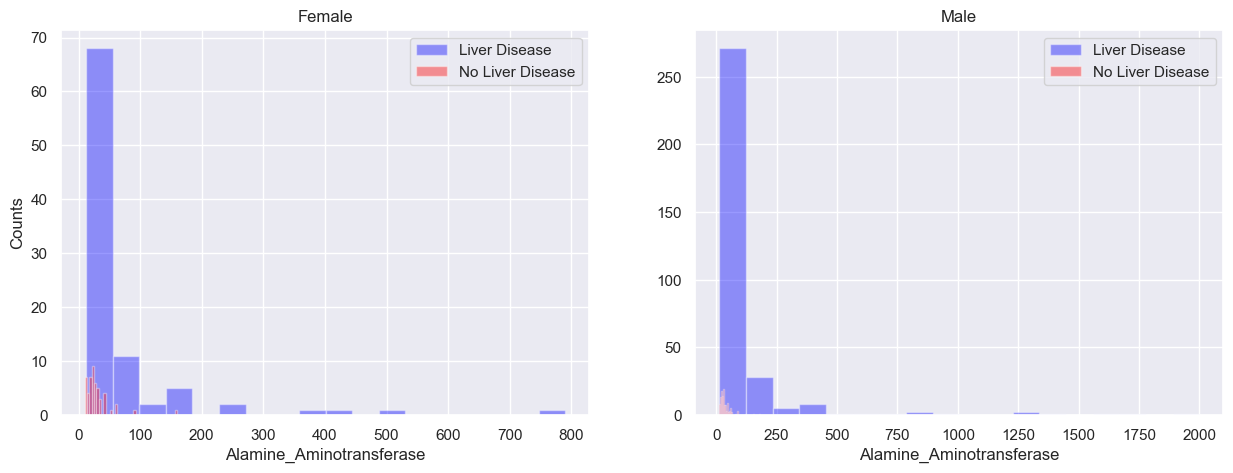

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualize the effect of the dataset(with or without disease) based on 'Alamine_Aminotransferase' and Gender.
ld = 'Liver Disease'
no_ld = 'No Liver Disease'
ax = sns.distplot(df[df['Gender'] == 0][df[df['Gender'] == 0]['IsDisease'] == 1]['Alamine_Aminotransferase'], 
                  bins=18, label=ld, ax=axes[0], kde=False, color='blue')
ax = sns.distplot(df[df['Gender'] == 0][df[df['Gender'] == 0]['IsDisease'] == 2]['Alamine_Aminotransferase'], 
                  bins=40, label=no_ld, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Counts')
ax = sns.distplot(df[df['Gender'] == 1][df[df['Gender'] == 1]['IsDisease'] == 1]['Alamine_Aminotransferase'], 
                  bins=18, label=ld, ax=axes[1], kde=False, color='blue')
ax = sns.distplot(df[df['Gender'] == 1][df[df['Gender'] == 1]['IsDisease'] == 2]['Alamine_Aminotransferase'], 
                  bins=40, label=no_ld, ax=axes[1], kde=False, color='red')
ax.legend()
ax.set_title('Male')

plt.show()

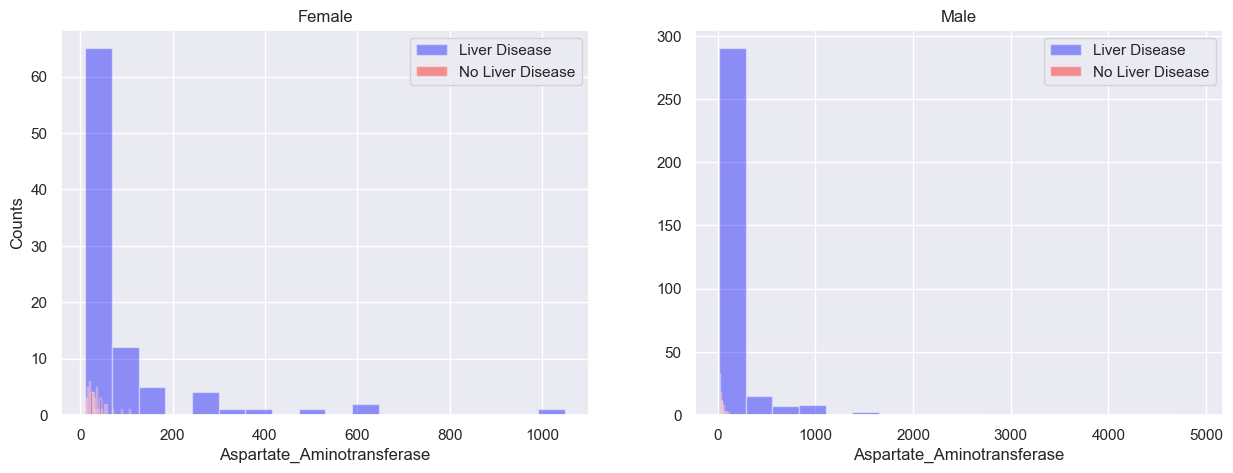

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualize the effect of the dataset(with or without disease) based on 'Aspartate_Aminotransferase' and Gender.
ld = 'Liver Disease'
no_ld = 'No Liver Disease'
ax = sns.distplot(df[df['Gender'] == 0][df[df['Gender'] == 0]['IsDisease'] == 1]['Aspartate_Aminotransferase'], 
                  bins=18, label=ld, ax=axes[0], kde=False, color='blue')
ax = sns.distplot(df[df['Gender'] == 0][df[df['Gender'] == 0]['IsDisease'] == 2]['Aspartate_Aminotransferase'], 
                  bins=40, label=no_ld, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Counts')
ax = sns.distplot(df[df['Gender'] == 1][df[df['Gender'] == 1]['IsDisease'] == 1]['Aspartate_Aminotransferase'], 
                  bins=18, label=ld, ax=axes[1], kde=False, color='blue')
ax = sns.distplot(df[df['Gender'] == 1][df[df['Gender'] == 1]['IsDisease'] == 2]['Aspartate_Aminotransferase'], 
                  bins=40, label=no_ld, ax=axes[1], kde=False, color='red')
ax.legend()
ax.set_title('Male')

plt.show()

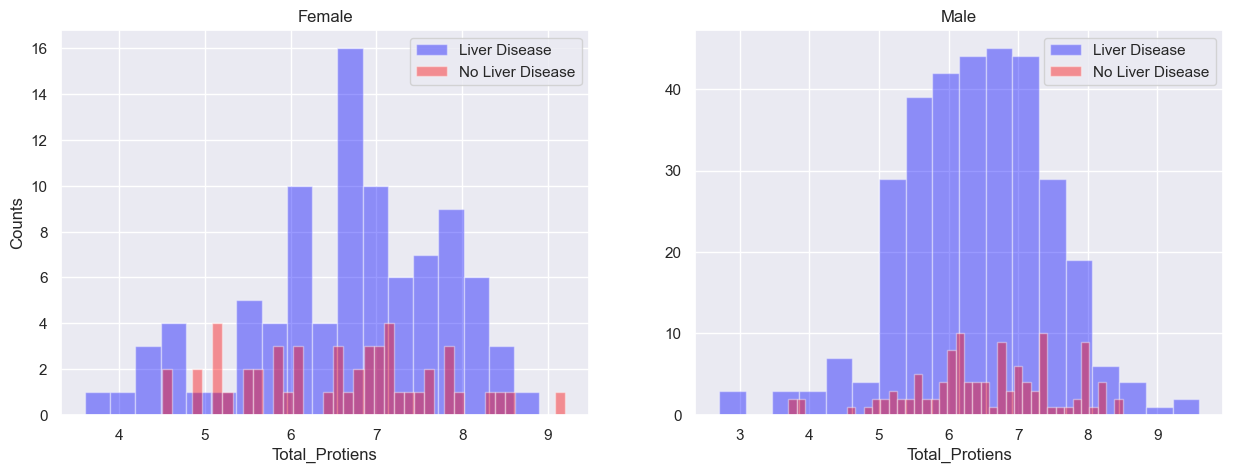

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualize the effect of the dataset(with or without disease) based on 'Total_Protiens' and Gender.
ld = 'Liver Disease'
no_ld = 'No Liver Disease'
ax = sns.distplot(df[df['Gender'] == 0][df[df['Gender'] == 0]['IsDisease'] == 1]['Total_Protiens'], 
                  bins=18, label=ld, ax=axes[0], kde=False, color='blue')
ax = sns.distplot(df[df['Gender'] == 0][df[df['Gender'] == 0]['IsDisease'] == 2]['Total_Protiens'], 
                  bins=40, label=no_ld, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Counts')
ax = sns.distplot(df[df['Gender'] == 1][df[df['Gender'] == 1]['IsDisease'] == 1]['Total_Protiens'], 
                  bins=18, label=ld, ax=axes[1], kde=False, color='blue')
ax = sns.distplot(df[df['Gender'] == 1][df[df['Gender'] == 1]['IsDisease'] == 2]['Total_Protiens'], 
                  bins=40, label=no_ld, ax=axes[1], kde=False, color='red')
ax.legend()
ax.set_title('Male')

plt.show()

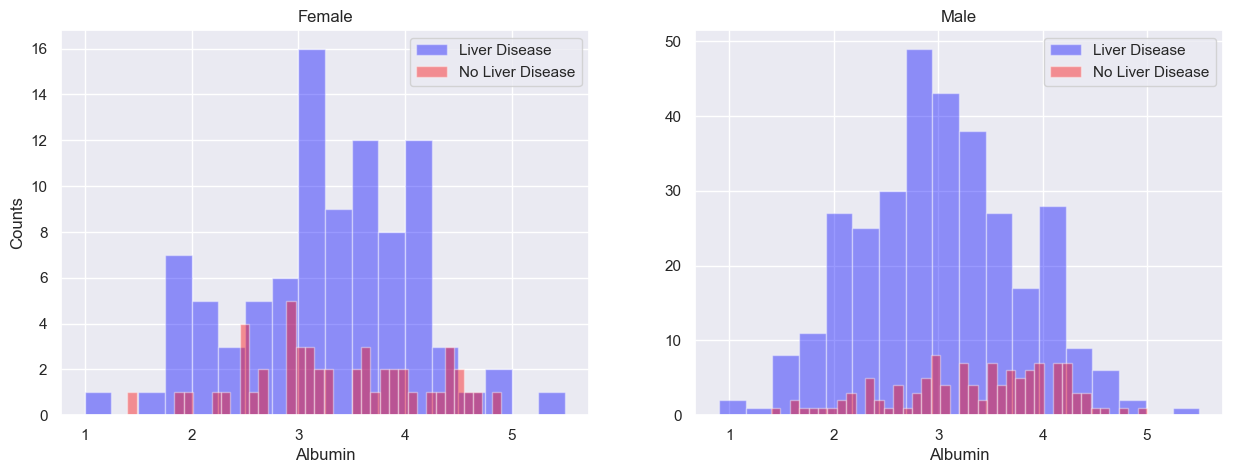

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualize the effect of the dataset(with or without disease) based on 'Albumin' and Gender.
ld = 'Liver Disease'
no_ld = 'No Liver Disease'
ax = sns.distplot(df[df['Gender'] == 0][df[df['Gender'] == 0]['IsDisease'] == 1]['Albumin'], 
                  bins=18, label=ld, ax=axes[0], kde=False, color='blue')
ax = sns.distplot(df[df['Gender'] == 0][df[df['Gender'] == 0]['IsDisease'] == 2]['Albumin'], 
                  bins=40, label=no_ld, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Counts')
ax = sns.distplot(df[df['Gender'] == 1][df[df['Gender'] == 1]['IsDisease'] == 1]['Albumin'], 
                  bins=18, label=ld, ax=axes[1], kde=False, color='blue')
ax = sns.distplot(df[df['Gender'] == 1][df[df['Gender'] == 1]['IsDisease'] == 2]['Albumin'], 
                  bins=40, label=no_ld, ax=axes[1], kde=False, color='red')
ax.legend()
ax.set_title('Male')

plt.show()

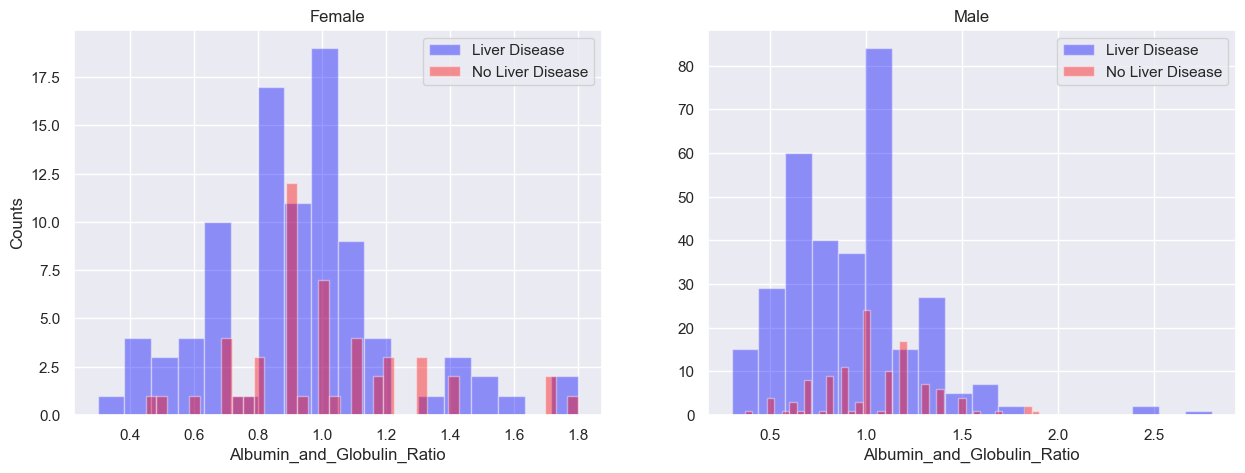

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualize the effect of the dataset(with or without disease) based on 'Albumin_and_Globulin_Ratio' and Gender.
ld = 'Liver Disease'
no_ld = 'No Liver Disease'
ax = sns.distplot(df[df['Gender'] == 0][df[df['Gender'] == 0]['IsDisease'] == 1]['Albumin_and_Globulin_Ratio'], 
                  bins=18, label=ld, ax=axes[0], kde=False, color='blue')
ax = sns.distplot(df[df['Gender'] == 0][df[df['Gender'] == 0]['IsDisease'] == 2]['Albumin_and_Globulin_Ratio'], 
                  bins=40, label=no_ld, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Counts')
ax = sns.distplot(df[df['Gender'] == 1][df[df['Gender'] == 1]['IsDisease'] == 1]['Albumin_and_Globulin_Ratio'], 
                  bins=18, label=ld, ax=axes[1], kde=False, color='blue')
ax = sns.distplot(df[df['Gender'] == 1][df[df['Gender'] == 1]['IsDisease'] == 2]['Albumin_and_Globulin_Ratio'], 
                  bins=40, label=no_ld, ax=axes[1], kde=False, color='red')
ax.legend()
ax.set_title('Male')

plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

model=LogisticRegression()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())


In [23]:
def model_creation(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    ypred_train=model.predict(x_train)
    ypred_test=model.predict(x_test)

    acc_train=accuracy_score(y_train,ypred_train)
    acc_test=accuracy_score(y_test,ypred_test)

    cv_score=cross_val_score(model,x,y,cv=5)

    cm=confusion_matrix(y_test,ypred_test)
    cr=classification_report(y_test,ypred_test)

    print("Train Accuracy Score :",acc_train)
    print("Test Accuracy Score :",acc_test)
    print("Cross validation Score :",cv_score.mean())
    print("confusion matrix :\n",cm)
    print("classification Report :\n",cr)
    

In [24]:
#!pip install xgboost

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Logistic Regression

In [26]:

x=df.drop(columns='IsDisease',axis=1)
y=df['IsDisease']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)



model=LogisticRegression()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.7103004291845494
Test Accuracy Score : 0.7521367521367521
Cross validation Score : 0.7084585912172119
confusion matrix :
 [[83  4]
 [25  5]]
classification Report :
               precision    recall  f1-score   support

           1       0.77      0.95      0.85        87
           2       0.56      0.17      0.26        30

    accuracy                           0.75       117
   macro avg       0.66      0.56      0.55       117
weighted avg       0.71      0.75      0.70       117



# KNN 

In [27]:

x=df.drop(columns='IsDisease',axis=1)
y=df['IsDisease']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)


model=KNeighborsClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.7811158798283262
Test Accuracy Score : 0.6666666666666666
Cross validation Score : 0.6637783672266431
confusion matrix :
 [[63 24]
 [15 15]]
classification Report :
               precision    recall  f1-score   support

           1       0.81      0.72      0.76        87
           2       0.38      0.50      0.43        30

    accuracy                           0.67       117
   macro avg       0.60      0.61      0.60       117
weighted avg       0.70      0.67      0.68       117



# Support Vector Machine (SVM)

In [28]:
x=df.drop(columns='IsDisease',axis=1)
y=df['IsDisease']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)


model=SVC()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.7060085836909872
Test Accuracy Score : 0.7435897435897436
Cross validation Score : 0.7135573239021515
confusion matrix :
 [[87  0]
 [30  0]]
classification Report :
               precision    recall  f1-score   support

           1       0.74      1.00      0.85        87
           2       0.00      0.00      0.00        30

    accuracy                           0.74       117
   macro avg       0.37      0.50      0.43       117
weighted avg       0.55      0.74      0.63       117



# Decision Tree Classifier

In [67]:
x=df.drop(columns='IsDisease',axis=1)
y=df['IsDisease']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

model=DecisionTreeClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)
print("\n")

from sklearn.tree import plot_tree
feature_names = list(x.columns)

# Plot the decision tree
plt.figure(figsize=(14, 8), dpi=100)
#plot_tree(model, filled=True, feature_names=feature_names)
plt.show()

Train Accuracy Score : 1.0
Test Accuracy Score : 0.7264957264957265
Cross validation Score : 0.6551576775714707
confusion matrix :
 [[68 19]
 [13 17]]
classification Report :
               precision    recall  f1-score   support

           1       0.84      0.78      0.81        87
           2       0.47      0.57      0.52        30

    accuracy                           0.73       117
   macro avg       0.66      0.67      0.66       117
weighted avg       0.75      0.73      0.73       117





<Figure size 1400x800 with 0 Axes>

# Randome Forest classifier

In [69]:
x=df.drop(columns='IsDisease',axis=1)
y=df['IsDisease']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

model=RandomForestClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 1.0
Test Accuracy Score : 0.7606837606837606
Cross validation Score : 0.7049366342469792
confusion matrix :
 [[76 11]
 [17 13]]
classification Report :
               precision    recall  f1-score   support

           1       0.82      0.87      0.84        87
           2       0.54      0.43      0.48        30

    accuracy                           0.76       117
   macro avg       0.68      0.65      0.66       117
weighted avg       0.75      0.76      0.75       117



# Ada boost Classifier

In [72]:
x=df.drop(columns='IsDisease',axis=1)
y=df['IsDisease']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

model=AdaBoostClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.8068669527896996
Test Accuracy Score : 0.7008547008547008
Cross validation Score : 0.6843353964043619
confusion matrix :
 [[71 16]
 [19 11]]
classification Report :
               precision    recall  f1-score   support

           1       0.79      0.82      0.80        87
           2       0.41      0.37      0.39        30

    accuracy                           0.70       117
   macro avg       0.60      0.59      0.59       117
weighted avg       0.69      0.70      0.70       117



# Gradient Boost Classifier

In [73]:
x=df.drop(columns='IsDisease',axis=1)
y=df['IsDisease']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

model=GradientBoostingClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.9313304721030042
Test Accuracy Score : 0.717948717948718
Cross validation Score : 0.6775419982316534
confusion matrix :
 [[75 12]
 [21  9]]
classification Report :
               precision    recall  f1-score   support

           1       0.78      0.86      0.82        87
           2       0.43      0.30      0.35        30

    accuracy                           0.72       117
   macro avg       0.60      0.58      0.59       117
weighted avg       0.69      0.72      0.70       117



# Exstrem gradient boosting Classifier (XGB)

In [14]:
x=df.drop(columns='IsDisease',axis=1)
y=df['IsDisease']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

model=XGBClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 1.0
Test Accuracy Score : 0.717948717948718
Cross validation Score : 0.6964190981432361
confusion matrix :
 [[72 15]
 [18 12]]
classification Report :
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        87
           1       0.44      0.40      0.42        30

    accuracy                           0.72       117
   macro avg       0.62      0.61      0.62       117
weighted avg       0.71      0.72      0.71       117



# Hence we choose SVC as final model

In [29]:
x=df.drop(columns='IsDisease',axis=1)
y=df['IsDisease']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)


model=SVC()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.7060085836909872
Test Accuracy Score : 0.7435897435897436
Cross validation Score : 0.7135573239021515
confusion matrix :
 [[87  0]
 [30  0]]
classification Report :
               precision    recall  f1-score   support

           1       0.74      1.00      0.85        87
           2       0.00      0.00      0.00        30

    accuracy                           0.74       117
   macro avg       0.37      0.50      0.43       117
weighted avg       0.55      0.74      0.63       117



In [30]:
from sklearn import preprocessing
x=df.drop(columns='IsDisease',axis=1)
y=df['IsDisease']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)


tf1 = ColumnTransformer([('Scaler', StandardScaler(), slice(0, 9))])
tf2=SVC()
pipe=make_pipeline(tf1,tf2)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
accuracy_score(y_pred,y_test)

0.7435897435897436

In [35]:
import pickle

In [36]:
pickle.dump(pipe,open('Liver.pkl','wb'))

In [38]:
liver_model=pickle.load(open('Liver.pkl','rb'))
test_input=np.array([65,0,0.7,0.1,187,16,18,6.8,3.3,0.9],dtype=object).reshape(1,10)
output=liver_model.predict(test_input)
if output==1:
    print("the patient has not Liver Diseases")
else:
     print("the patient has Liver Diseases")

the patient has not Liver Diseases


In [39]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'IsDisease'],
      dtype='object')